In [9]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools

Preconfiguring packages ...
Selecting previously unselected package cron.
(Reading database ... 18408 files and directories currently installed.)
Preparing to unpack .../00-cron_3.0pl1-128ubuntu5_amd64.deb ...
Unpacking cron (3.0pl1-128ubuntu5) ...
Selecting previously unselected package libapparmor1:amd64.
Preparing to unpack .../01-libapparmor1_2.11.0-2ubuntu17.1_amd64.deb ...
Unpacking libapparmor1:amd64 (2.11.0-2ubuntu17.1) ...
Selecting previously unselected package libdbus-1-3:amd64.
Preparing to unpack .../02-libdbus-1-3_1.10.22-1ubuntu1_amd64.deb ...
Unpacking libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Selecting previously unselected package dbus.
Preparing to unpack .../03-dbus_1.10.22-1ubuntu1_amd64.deb ...
Unpacking dbus (1.10.22-1ubuntu1) ...
Selecting previously unselected package dirmngr.
Preparing to unpack .../04-dirmngr_2.1.15-1ubuntu8.1_amd64.deb ...
Unpacking dirmngr (2.1.15-1ubuntu8.1) ...
Selecting previously unselected package distro-info-data.
Preparing to unpack .


Creating config file /etc/apt/apt.conf.d/50unattended-upgrades with new version
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up dirmngr (2.1.15-1ubuntu8.1) ...
Setting up cron (3.0pl1-128ubuntu5) ...
Adding group `crontab' (GID 102) ...
Done.
update-rc.d: warning: start and stop actions are no longer supported; falling back to defaults
update-rc.d: warning: stop runlevel arguments (1) do not match cron Default-Stop values (none)
invoke-rc.d: could not determine current runlevel
invoke-rc.d: policy-rc.d denied execution of start.
Setting up libdbus-1-3:amd64 (1.10.22-1ubuntu1) ...
Setting up kmod (24-1ubuntu2) ...
Setting up libdbus-glib-1-2:amd64 (0.108-2) ...
Setting up python3-gi (3.24.1-2build1) ...
Setting up module-init-tools (24-1ubuntu2) ...
Setting up python3-software-properties (0.96.24.17) ...
Setting up dbus (1.10.22-1ubuntu1) ...
Setting up python-apt (1.4.0~beta3build2) ...
Setting up python3-dbus (1.2.4-1bu

In [0]:
# Downloading All the Necessary Packages

In [10]:
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null


gpg: keybox '/tmp/tmp7ipkry1u/pubring.gpg' created
gpg: /tmp/tmp7ipkry1u/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1


In [0]:
!apt-get update -qq 2>&1 > /dev/null

In [13]:
!apt-get -y install -qq google-drive-ocamlfuse fuse

Selecting previously unselected package libfuse2:amd64.
(Reading database ... 19816 files and directories currently installed.)
Preparing to unpack .../libfuse2_2.9.7-1ubuntu1_amd64.deb ...
Unpacking libfuse2:amd64 (2.9.7-1ubuntu1) ...
Selecting previously unselected package fuse.
Preparing to unpack .../fuse_2.9.7-1ubuntu1_amd64.deb ...
Unpacking fuse (2.9.7-1ubuntu1) ...
Selecting previously unselected package google-drive-ocamlfuse.
Preparing to unpack .../google-drive-ocamlfuse_0.6.21-0ubuntu2_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.6.21-0ubuntu2) ...
Setting up libfuse2:amd64 (2.9.7-1ubuntu1) ...
Processing triggers for libc-bin (2.26-0ubuntu2.1) ...
Setting up fuse (2.9.7-1ubuntu1) ...
Setting up google-drive-ocamlfuse (0.6.21-0ubuntu2) ...


In [0]:
from google.colab import auth
auth.authenticate_user()

In [0]:
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [21]:
!mkdir -p drive
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [0]:
#All the code and datasets that are Taken from the tutorial of pyimagesearch, Keras Multi label Classification, To get to know about how code works, please visit the link https://www.pyimagesearch.com/2018/05/07/multi-label-classification-with-keras/

In [0]:
import zipfile
with zipfile.ZipFile("drive/Papers/dataset.zip","r") as zip_ref:
    zip_ref.extractall("datasetzs")

In [27]:
ls datasetzs

black_jeans/  blue_dress/  blue_jeans/  blue_shirt/  red_dress/  red_shirt/


In [90]:
!pip install imutils

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
import argparse
import random
import pickle
import cv2
import os


In [0]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K

class SmallerVGGNet:
	@staticmethod
	def build(width, height, depth, classes, finalAct="softmax"):
		# initialize the model along with the input shape to be
		# "channels last" and the channels dimension itself
		model = Sequential()
		inputShape = (height, width, depth)
		chanDim = -1

		# if we are using "channels first", update the input shape
		# and channels dimension
		if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)
			chanDim = 1

		# CONV => RELU => POOL
		model.add(Conv2D(32, (3, 3), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(3, 3)))
		model.add(Dropout(0.25))

		# (CONV => RELU) * 2 => POOL
		model.add(Conv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(64, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))

		# (CONV => RELU) * 2 => POOL
		model.add(Conv2D(128, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(Conv2D(128, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(BatchNormalization(axis=chanDim))
		model.add(MaxPooling2D(pool_size=(2, 2)))
		model.add(Dropout(0.25))

		# first (and only) set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(1024))
		model.add(Activation("relu"))
		model.add(BatchNormalization())
		model.add(Dropout(0.5))

		# softmax classifier
		model.add(Dense(classes))
		model.add(Activation(finalAct))

		# return the constructed network architecture
		return model

In [0]:
EPOCHS = 75
INIT_LR = 1e-3
BS = 32
IMAGE_DIMS = (96, 96, 3)

In [41]:
print("[INFO] loading images...")
imagePaths = sorted(list(paths.list_images("datasetzs")))
random.seed(42)
random.shuffle(imagePaths)

[INFO] loading images...


In [0]:
data = []
labels = []

In [43]:
for imagePath in imagePaths:
  # load the image, pre-process it, and store it in the data list
  image = cv2.imread(imagePath)
  image = cv2.resize(image, (IMAGE_DIMS[1], IMAGE_DIMS[0]))
  image = img_to_array(image)
  data.append(image)
  print(imagePath) 

	# extract set of class labels from the image path and update the
	# labels list
  l = label = imagePath.split(os.path.sep)[-2].split("_")
  labels.append(l)

datasetzs/blue_dress/00000381.jpeg
datasetzs/red_shirt/00000092.png
datasetzs/blue_jeans/00000056.jpg
datasetzs/blue_dress/00000163.jpg
datasetzs/red_dress/00000098.jpg
datasetzs/red_dress/00000007.jpg
datasetzs/blue_shirt/00000270.jpg
datasetzs/black_jeans/00000028.jpg
datasetzs/blue_shirt/00000385.jpeg
datasetzs/red_shirt/00000029.jpg
datasetzs/blue_jeans/00000114.jpeg
datasetzs/red_dress/00000176.jpg
datasetzs/red_shirt/00000051.jpg
datasetzs/blue_dress/00000374.jpg
datasetzs/black_jeans/00000318.jpg
datasetzs/red_dress/00000121.jpg
datasetzs/red_dress/00000259.jpg
datasetzs/blue_shirt/00000108.jpg
datasetzs/blue_jeans/00000370.jpeg
datasetzs/red_shirt/00000317.jpg
datasetzs/blue_dress/00000135.jpg
datasetzs/red_dress/00000231.jpg
datasetzs/red_dress/00000239.jpg
datasetzs/blue_shirt/00000144.JPG
datasetzs/blue_shirt/00000232.jpg
datasetzs/red_dress/00000268.jpg
datasetzs/blue_jeans/00000351.jpg
datasetzs/black_jeans/00000019.jpg
datasetzs/blue_jeans/00000313.jpg
datasetzs/red_shirt

datasetzs/blue_dress/00000186.jpg
datasetzs/blue_jeans/00000118.jpg
datasetzs/blue_jeans/00000356.jpg
datasetzs/black_jeans/00000024.jpg
datasetzs/blue_jeans/00000162.jpg
datasetzs/blue_shirt/00000264.jpg
datasetzs/blue_shirt/00000063.jpg
datasetzs/blue_jeans/00000181.jpeg
datasetzs/blue_shirt/00000316.jpg
datasetzs/blue_dress/00000121.jpg
datasetzs/black_jeans/00000072.jpg
datasetzs/black_jeans/00000349.jpg
datasetzs/black_jeans/00000283.png
datasetzs/red_shirt/00000068.jpg
datasetzs/red_dress/00000217.jpg
datasetzs/blue_shirt/00000308.jpg
datasetzs/red_dress/00000369.jpg
datasetzs/red_shirt/00000310.jpg
datasetzs/blue_jeans/00000210.jpg
datasetzs/blue_jeans/00000042.jpg
datasetzs/red_dress/00000177.jpg
datasetzs/blue_jeans/00000230.jpg
datasetzs/red_shirt/00000133.jpg
datasetzs/red_shirt/00000251.jpg
datasetzs/blue_shirt/00000028.jpeg
datasetzs/red_shirt/00000183.jpg
datasetzs/black_jeans/00000209.jpg
datasetzs/blue_shirt/00000231.jpg
datasetzs/blue_jeans/00000261.jpg
datasetzs/blue_

datasetzs/red_dress/00000351.jpg
datasetzs/blue_shirt/00000096.jpg
datasetzs/black_jeans/00000010.jpg
datasetzs/blue_dress/00000144.jpg
datasetzs/blue_shirt/00000222.jpg
datasetzs/blue_jeans/00000009.jpg
datasetzs/black_jeans/00000228.jpg
datasetzs/black_jeans/00000348.jpeg
datasetzs/blue_dress/00000019.jpg
datasetzs/black_jeans/00000222.JPG
datasetzs/red_dress/00000102.jpg
datasetzs/red_dress/00000309.jpg
datasetzs/blue_jeans/00000208.jpg
datasetzs/black_jeans/00000171.jpg
datasetzs/blue_jeans/00000263.jpg
datasetzs/blue_shirt/00000352.jpg
datasetzs/red_shirt/00000139.png
datasetzs/blue_jeans/00000146.jpg
datasetzs/blue_jeans/00000198.jpg
datasetzs/red_shirt/00000076.png
datasetzs/blue_shirt/00000182.jpg
datasetzs/blue_shirt/00000188.jpeg
datasetzs/red_shirt/00000066.jpg
datasetzs/red_dress/00000021.jpg
datasetzs/blue_shirt/00000236.jpg
datasetzs/black_jeans/00000195.jpg
datasetzs/blue_dress/00000070.jpeg
datasetzs/black_jeans/00000364.jpeg
datasetzs/blue_dress/00000084.jpg
datasetzs/

datasetzs/black_jeans/00000266.jpg
datasetzs/black_jeans/00000363.jpeg
datasetzs/black_jeans/00000054.jpg
datasetzs/black_jeans/00000022.jpg
datasetzs/red_shirt/00000272.jpg
datasetzs/red_shirt/00000292.jpg
datasetzs/red_dress/00000062.jpg
datasetzs/black_jeans/00000232.jpg
datasetzs/red_dress/00000187.jpg
datasetzs/blue_shirt/00000146.jpg
datasetzs/blue_jeans/00000076.jpeg
datasetzs/black_jeans/00000134.jpg
datasetzs/blue_shirt/00000321.jpg
datasetzs/black_jeans/00000300.jpg
datasetzs/blue_jeans/00000281.jpg
datasetzs/black_jeans/00000065.jpg
datasetzs/red_dress/00000035.jpg
datasetzs/blue_shirt/00000050.jpg
datasetzs/red_shirt/00000188.jpg
datasetzs/blue_dress/00000033.jpg
datasetzs/red_dress/00000112.jpg
datasetzs/blue_jeans/00000023.jpg
datasetzs/blue_shirt/00000037.jpg
datasetzs/black_jeans/00000258.jpg
datasetzs/red_dress/00000220.jpg
datasetzs/blue_jeans/00000241.jpg
datasetzs/red_dress/00000179.jpg
datasetzs/blue_jeans/00000034.jpeg
datasetzs/red_shirt/00000181.jpg
datasetzs/bl

datasetzs/blue_jeans/00000205.jpg
datasetzs/black_jeans/00000325.jpg
datasetzs/blue_dress/00000376.jpg
datasetzs/black_jeans/00000182.jpeg
datasetzs/blue_dress/00000112.jpg
datasetzs/blue_jeans/00000302.jpg
datasetzs/red_dress/00000042.jpg
datasetzs/blue_shirt/00000242.jpg
datasetzs/blue_dress/00000310.jpg
datasetzs/blue_jeans/00000052.jpg
datasetzs/black_jeans/00000105.jpg
datasetzs/blue_dress/00000102.jpg
datasetzs/black_jeans/00000097.jpg
datasetzs/red_shirt/00000153.jpg
datasetzs/blue_jeans/00000361.jpeg
datasetzs/black_jeans/00000313.jpeg
datasetzs/blue_jeans/00000223.jpeg
datasetzs/red_shirt/00000296.jpeg
datasetzs/blue_shirt/00000169.png
datasetzs/blue_jeans/00000359.jpg
datasetzs/black_jeans/00000073.jpg
datasetzs/blue_dress/00000293.jpg
datasetzs/black_jeans/00000037.jpg
datasetzs/blue_shirt/00000178.jpg
datasetzs/red_dress/00000216.jpg
datasetzs/red_shirt/00000383.jpg
datasetzs/blue_jeans/00000051.jpg
datasetzs/blue_jeans/00000186.jpg
datasetzs/blue_jeans/00000006.jpg
dataset

datasetzs/blue_dress/00000120.jpeg
datasetzs/blue_jeans/00000128.jpg
datasetzs/blue_shirt/00000056.png
datasetzs/black_jeans/00000259.jpg
datasetzs/red_dress/00000219.jpeg
datasetzs/black_jeans/00000187.jpeg
datasetzs/red_shirt/00000180.jpg
datasetzs/blue_shirt/00000066.jpeg
datasetzs/red_dress/00000266.jpg
datasetzs/black_jeans/00000330.jpg
datasetzs/black_jeans/00000114.jpeg
datasetzs/blue_shirt/00000095.jpg
datasetzs/black_jeans/00000162.jpg
datasetzs/blue_jeans/00000291.png
datasetzs/blue_jeans/00000094.jpg
datasetzs/black_jeans/00000143.jpg
datasetzs/black_jeans/00000249.jpg
datasetzs/blue_jeans/00000260.jpeg
datasetzs/blue_dress/00000176.jpg
datasetzs/black_jeans/00000110.jpg
datasetzs/blue_dress/00000034.jpeg
datasetzs/blue_shirt/00000214.jpg
datasetzs/red_shirt/00000357.jpg
datasetzs/blue_jeans/00000262.jpg
datasetzs/blue_jeans/00000242.jpg
datasetzs/blue_dress/00000243.jpg
datasetzs/blue_shirt/00000089.jpg
datasetzs/blue_shirt/00000255.jpg
datasetzs/red_dress/00000245.jpg
data

datasetzs/blue_jeans/00000283.jpeg
datasetzs/red_shirt/00000137.jpg
datasetzs/blue_shirt/00000151.jpg
datasetzs/blue_shirt/00000032.png
datasetzs/red_dress/00000158.jpg
datasetzs/red_dress/00000370.jpg
datasetzs/blue_jeans/00000072.jpg
datasetzs/blue_dress/00000272.jpg
datasetzs/blue_dress/00000386.jpg
datasetzs/black_jeans/00000013.jpg
datasetzs/red_shirt/00000005.png
datasetzs/blue_jeans/00000053.jpg
datasetzs/blue_shirt/00000093.jpg
datasetzs/black_jeans/00000041.jpg
datasetzs/blue_shirt/00000353.jpg
datasetzs/red_shirt/00000356.jpg
datasetzs/blue_jeans/00000071.jpg
datasetzs/blue_jeans/00000136.jpg
datasetzs/blue_dress/00000081.jpg
datasetzs/black_jeans/00000136.jpg
datasetzs/blue_jeans/00000127.jpg
datasetzs/blue_jeans/00000234.jpg
datasetzs/blue_shirt/00000025.jpg
datasetzs/blue_dress/00000342.jpeg
datasetzs/blue_jeans/00000110.jpg
datasetzs/blue_jeans/00000125.jpg
datasetzs/red_shirt/00000144.jpg
datasetzs/red_shirt/00000115.jpg
datasetzs/blue_shirt/00000377.jpeg
datasetzs/black

datasetzs/blue_jeans/00000120.jpg
datasetzs/blue_dress/00000018.jpg
datasetzs/red_dress/00000210.jpg
datasetzs/red_dress/00000188.jpg
datasetzs/black_jeans/00000353.jpeg
datasetzs/red_shirt/00000271.jpg
datasetzs/black_jeans/00000337.jpeg
datasetzs/red_dress/00000080.JPG
datasetzs/blue_shirt/00000190.jpg
datasetzs/red_shirt/00000045.jpg
datasetzs/blue_shirt/00000060.jpg
datasetzs/red_dress/00000146.jpg
datasetzs/blue_dress/00000390.jpg
datasetzs/black_jeans/00000225.jpg
datasetzs/blue_shirt/00000288.jpg
datasetzs/red_shirt/00000065.jpg
datasetzs/blue_shirt/00000323.jpg
datasetzs/blue_dress/00000088.jpg
datasetzs/blue_jeans/00000003.jpg
datasetzs/red_dress/00000373.jpg
datasetzs/red_dress/00000180.jpeg
datasetzs/blue_jeans/00000018.jpeg
datasetzs/blue_dress/00000292.jpg
datasetzs/black_jeans/00000090.jpg
datasetzs/black_jeans/00000278.jpeg
datasetzs/blue_jeans/00000157.jpg
datasetzs/black_jeans/00000322.jpg
datasetzs/blue_shirt/00000045.jpg
datasetzs/blue_shirt/00000106.png
datasetzs/re

datasetzs/red_dress/00000038.jpg
datasetzs/red_dress/00000324.jpg
datasetzs/blue_jeans/00000237.jpg
datasetzs/blue_jeans/00000117.jpg
datasetzs/blue_jeans/00000144.jpg
datasetzs/blue_dress/00000391.jpg
datasetzs/blue_jeans/00000159.jpg
datasetzs/blue_shirt/00000272.jpeg
datasetzs/black_jeans/00000213.jpg
datasetzs/black_jeans/00000207.jpeg
datasetzs/blue_dress/00000046.jpg
datasetzs/blue_jeans/00000109.jpg
datasetzs/red_dress/00000203.jpeg
datasetzs/red_shirt/00000106.jpg
datasetzs/red_dress/00000155.jpg
datasetzs/blue_dress/00000155.jpg
datasetzs/blue_jeans/00000249.jpg
datasetzs/blue_shirt/00000094.jpg
datasetzs/blue_shirt/00000083.jpg
datasetzs/red_dress/00000364.jpg
datasetzs/red_shirt/00000083.jpg
datasetzs/red_shirt/00000320.jpg
datasetzs/black_jeans/00000287.jpeg
datasetzs/red_shirt/00000163.jpg
datasetzs/blue_dress/00000096.jpeg
datasetzs/blue_jeans/00000278.jpg
datasetzs/blue_shirt/00000294.jpg
datasetzs/blue_dress/00000231.jpg
datasetzs/blue_dress/00000145.jpeg
datasetzs/blue

datasetzs/red_dress/00000281.jpg
datasetzs/blue_dress/00000012.jpg
datasetzs/blue_dress/00000077.jpg
datasetzs/blue_dress/00000232.jpeg
datasetzs/blue_jeans/00000192.jpeg
datasetzs/blue_jeans/00000287.jpg
datasetzs/blue_shirt/00000040.png
datasetzs/black_jeans/00000107.jpg
datasetzs/blue_dress/00000114.jpg


In [44]:
# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)
print("[INFO] data matrix: {} images ({:.2f}MB)".format(
	len(imagePaths), data.nbytes / (1024 * 1000.0)))

# binarize the labels using scikit-learn's special multi-label
# binarizer implementation
print("[INFO] class labels:")
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(labels)

# loop over each of the possible class labels and show them
for (i, label) in enumerate(mlb.classes_):
	print("{}. {}".format(i + 1, label))

[INFO] data matrix: 2165 images (467.64MB)
[INFO] class labels:
1. black
2. blue
3. dress
4. jeans
5. red
6. shirt


In [0]:
# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.2, random_state=42)

# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
	height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
	horizontal_flip=True, fill_mode="nearest")


In [70]:
# initialize the model using a sigmoid activation as the final layer
# in the network so we can perform multi-label classification
print("[INFO] compiling model...")
model = SmallerVGGNet.build(
	width=IMAGE_DIMS[1], height=IMAGE_DIMS[0],
	depth=IMAGE_DIMS[2], classes=len(mlb.classes_),
	finalAct="sigmoid")

# initialize the optimizer (SGD is sufficient)
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

# compile the model using binary cross-entropy rather than
# categorical cross-entropy -- this may seem counterintuitive for
# multi-label classification, but keep in mind that the goal here
# is to treat each output label as an independent Bernoulli
# distribution
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# train the network
print("[INFO] training network...")
H = model.fit_generator(
	aug.flow(trainX, trainY, batch_size=BS),
	validation_data=(testX, testY),
	steps_per_epoch=len(trainX) // BS,
	epochs=EPOCHS, verbose=1)

[INFO] compiling model...
[INFO] training network...
Epoch 1/75
54/54 [==============================] - 8s 156ms/step - loss: 0.3648 - acc: 0.8616 - val_loss: 0.3876 - val_acc: 0.8661
Epoch 2/75
54/54 [==============================] - 6s 114ms/step - loss: 0.1832 - acc: 0.9322 - val_loss: 0.2315 - val_acc: 0.9288
Epoch 3/75
54/54 [==============================] - 6s 115ms/step - loss: 0.1501 - acc: 0.9467 - val_loss: 0.2328 - val_acc: 0.9442
Epoch 4/75
54/54 [==============================] - 6s 113ms/step - loss: 0.1366 - acc: 0.9493 - val_loss: 0.0948 - val_acc: 0.9731
Epoch 5/75
42/54 [======================>.......] - ETA: 1s - loss: 0.1291 - acc: 0.9514

54/54 [==============================] - 6s 114ms/step - loss: 0.1303 - acc: 0.9522 - val_loss: 0.1239 - val_acc: 0.9638
Epoch 6/75
54/54 [==============================] - 6s 113ms/step - loss: 0.1163 - acc: 0.9589 - val_loss: 0.1707 - val_acc: 0.9496
Epoch 7/75
54/54 [==============================] - 6s 113ms/step - loss: 0.0980 - acc: 0.9654 - val_loss: 0.4270 - val_acc: 0.8888
Epoch 8/75
54/54 [==============================] - 6s 113ms/step - loss: 0.1050 - acc: 0.9625 - val_loss: 0.5554 - val_acc: 0.8595
Epoch 9/75
54/54 [==============================] - 6s 115ms/step - loss: 0.0877 - acc: 0.9677 - val_loss: 0.0615 - val_acc: 0.9792
Epoch 10/75
16/54 [=======>......................] - ETA: 3s - loss: 0.0817 - acc: 0.9691

54/54 [==============================] - 6s 114ms/step - loss: 0.0792 - acc: 0.9708 - val_loss: 0.0589 - val_acc: 0.9831
Epoch 11/75
54/54 [==============================] - 6s 111ms/step - loss: 0.0821 - acc: 0.9713 - val_loss: 0.1292 - val_acc: 0.9600
Epoch 12/75
54/54 [==============================] - 6s 113ms/step - loss: 0.1267 - acc: 0.9563 - val_loss: 0.1864 - val_acc: 0.9507
Epoch 13/75
54/54 [==============================] - 6s 109ms/step - loss: 0.1264 - acc: 0.9592 - val_loss: 0.4951 - val_acc: 0.8737
Epoch 14/75
54/54 [==============================] - 6s 110ms/step - loss: 0.1203 - acc: 0.9571 - val_loss: 0.1010 - val_acc: 0.9681
Epoch 15/75
13/54 [======>.......................] - ETA: 3s - loss: 0.0832 - acc: 0.9724

54/54 [==============================] - 6s 111ms/step - loss: 0.0857 - acc: 0.9706 - val_loss: 0.1495 - val_acc: 0.9561
Epoch 16/75
54/54 [==============================] - 6s 112ms/step - loss: 0.0795 - acc: 0.9712 - val_loss: 0.0514 - val_acc: 0.9811
Epoch 17/75
54/54 [==============================] - 6s 110ms/step - loss: 0.1013 - acc: 0.9671 - val_loss: 0.2054 - val_acc: 0.9269
Epoch 18/75
54/54 [==============================] - 6s 114ms/step - loss: 0.0990 - acc: 0.9640 - val_loss: 0.0734 - val_acc: 0.9742
Epoch 19/75
54/54 [==============================] - 6s 112ms/step - loss: 0.0735 - acc: 0.9725 - val_loss: 0.0895 - val_acc: 0.9661
Epoch 20/75
13/54 [======>.......................] - ETA: 3s - loss: 0.1400 - acc: 0.9603

54/54 [==============================] - 6s 113ms/step - loss: 0.0921 - acc: 0.9710 - val_loss: 0.0639 - val_acc: 0.9784
Epoch 21/75
54/54 [==============================] - 6s 109ms/step - loss: 0.1217 - acc: 0.9601 - val_loss: 0.2155 - val_acc: 0.9380
Epoch 22/75
54/54 [==============================] - 6s 110ms/step - loss: 0.0895 - acc: 0.9677 - val_loss: 0.2703 - val_acc: 0.9145
Epoch 23/75
54/54 [==============================] - 6s 114ms/step - loss: 0.0605 - acc: 0.9759 - val_loss: 0.0686 - val_acc: 0.9738
Epoch 24/75
54/54 [==============================] - 6s 111ms/step - loss: 0.0833 - acc: 0.9711 - val_loss: 0.1150 - val_acc: 0.9681
Epoch 25/75
12/54 [=====>........................] - ETA: 3s - loss: 0.0737 - acc: 0.9761

54/54 [==============================] - 6s 112ms/step - loss: 0.0682 - acc: 0.9768 - val_loss: 0.0622 - val_acc: 0.9769
Epoch 26/75
54/54 [==============================] - 6s 111ms/step - loss: 0.0729 - acc: 0.9762 - val_loss: 0.0400 - val_acc: 0.9873
Epoch 27/75
54/54 [==============================] - 6s 110ms/step - loss: 0.0662 - acc: 0.9765 - val_loss: 0.0645 - val_acc: 0.9765
Epoch 28/75
54/54 [==============================] - 6s 113ms/step - loss: 0.0753 - acc: 0.9736 - val_loss: 0.1122 - val_acc: 0.9615
Epoch 29/75
54/54 [==============================] - 6s 111ms/step - loss: 0.0796 - acc: 0.9714 - val_loss: 0.2349 - val_acc: 0.9315
Epoch 30/75
12/54 [=====>........................] - ETA: 3s - loss: 0.0623 - acc: 0.9774

54/54 [==============================] - 6s 114ms/step - loss: 0.0657 - acc: 0.9767 - val_loss: 0.0692 - val_acc: 0.9773
Epoch 31/75
54/54 [==============================] - 6s 110ms/step - loss: 0.0814 - acc: 0.9725 - val_loss: 0.4157 - val_acc: 0.8903
Epoch 32/75
54/54 [==============================] - 6s 110ms/step - loss: 0.0841 - acc: 0.9732 - val_loss: 0.3960 - val_acc: 0.9138
Epoch 33/75
54/54 [==============================] - 6s 116ms/step - loss: 0.0680 - acc: 0.9765 - val_loss: 0.0829 - val_acc: 0.9704
Epoch 34/75
54/54 [==============================] - 6s 111ms/step - loss: 0.0698 - acc: 0.9782 - val_loss: 0.1494 - val_acc: 0.9500
Epoch 35/75
12/54 [=====>........................] - ETA: 3s - loss: 0.0547 - acc: 0.9818

54/54 [==============================] - 6s 111ms/step - loss: 0.0824 - acc: 0.9744 - val_loss: 0.0637 - val_acc: 0.9792
Epoch 36/75
54/54 [==============================] - 6s 112ms/step - loss: 0.0688 - acc: 0.9757 - val_loss: 0.0686 - val_acc: 0.9742
Epoch 37/75
54/54 [==============================] - 6s 111ms/step - loss: 0.0838 - acc: 0.9704 - val_loss: 0.0552 - val_acc: 0.9834
Epoch 38/75
54/54 [==============================] - 6s 112ms/step - loss: 0.0527 - acc: 0.9798 - val_loss: 0.0384 - val_acc: 0.9869
Epoch 39/75
54/54 [==============================] - 6s 112ms/step - loss: 0.0574 - acc: 0.9816 - val_loss: 0.0471 - val_acc: 0.9869
Epoch 40/75
12/54 [=====>........................] - ETA: 3s - loss: 0.0511 - acc: 0.9779

54/54 [==============================] - 6s 112ms/step - loss: 0.0700 - acc: 0.9739 - val_loss: 0.0499 - val_acc: 0.9804
Epoch 41/75
54/54 [==============================] - 6s 114ms/step - loss: 0.0692 - acc: 0.9727 - val_loss: 0.0490 - val_acc: 0.9827
Epoch 42/75
54/54 [==============================] - 6s 112ms/step - loss: 0.0515 - acc: 0.9820 - val_loss: 0.0320 - val_acc: 0.9896
Epoch 43/75
54/54 [==============================] - 6s 114ms/step - loss: 0.0549 - acc: 0.9808 - val_loss: 0.0243 - val_acc: 0.9904
Epoch 44/75
54/54 [==============================] - 6s 113ms/step - loss: 0.0922 - acc: 0.9679 - val_loss: 0.1414 - val_acc: 0.9530
Epoch 45/75
13/54 [======>.......................] - ETA: 3s - loss: 0.0676 - acc: 0.9760

54/54 [==============================] - 6s 112ms/step - loss: 0.0701 - acc: 0.9735 - val_loss: 0.0811 - val_acc: 0.9734
Epoch 46/75
54/54 [==============================] - 6s 111ms/step - loss: 0.0718 - acc: 0.9750 - val_loss: 0.0422 - val_acc: 0.9854
Epoch 47/75
54/54 [==============================] - 6s 115ms/step - loss: 0.0456 - acc: 0.9824 - val_loss: 0.0370 - val_acc: 0.9865
Epoch 48/75
54/54 [==============================] - 6s 112ms/step - loss: 0.0452 - acc: 0.9841 - val_loss: 0.0840 - val_acc: 0.9711
Epoch 49/75
54/54 [==============================] - 6s 112ms/step - loss: 0.0727 - acc: 0.9776 - val_loss: 0.0509 - val_acc: 0.9796
Epoch 50/75
13/54 [======>.......................] - ETA: 3s - loss: 0.0481 - acc: 0.9832

54/54 [==============================] - 6s 112ms/step - loss: 0.0517 - acc: 0.9833 - val_loss: 0.0525 - val_acc: 0.9808
Epoch 51/75
54/54 [==============================] - 6s 112ms/step - loss: 0.0450 - acc: 0.9844 - val_loss: 0.0362 - val_acc: 0.9869
Epoch 52/75
54/54 [==============================] - 6s 110ms/step - loss: 0.0361 - acc: 0.9872 - val_loss: 0.0348 - val_acc: 0.9888
Epoch 53/75
54/54 [==============================] - 6s 110ms/step - loss: 0.0534 - acc: 0.9828 - val_loss: 0.0252 - val_acc: 0.9904
Epoch 54/75
54/54 [==============================] - 6s 110ms/step - loss: 0.0446 - acc: 0.9858 - val_loss: 0.0564 - val_acc: 0.9796
Epoch 55/75
14/54 [======>.......................] - ETA: 3s - loss: 0.0696 - acc: 0.9758

54/54 [==============================] - 6s 111ms/step - loss: 0.0536 - acc: 0.9825 - val_loss: 0.0402 - val_acc: 0.9861
Epoch 56/75
54/54 [==============================] - 6s 111ms/step - loss: 0.0424 - acc: 0.9847 - val_loss: 0.0256 - val_acc: 0.9919
Epoch 57/75
54/54 [==============================] - 6s 117ms/step - loss: 0.0464 - acc: 0.9836 - val_loss: 0.0234 - val_acc: 0.9931
Epoch 58/75
54/54 [==============================] - 7s 120ms/step - loss: 0.0708 - acc: 0.9762 - val_loss: 0.0874 - val_acc: 0.9688
Epoch 59/75
54/54 [==============================] - 6s 114ms/step - loss: 0.0494 - acc: 0.9812 - val_loss: 0.0453 - val_acc: 0.9842
Epoch 60/75
12/54 [=====>........................] - ETA: 4s - loss: 0.0533 - acc: 0.9796

54/54 [==============================] - 6s 112ms/step - loss: 0.0415 - acc: 0.9846 - val_loss: 0.0555 - val_acc: 0.9823
Epoch 61/75
54/54 [==============================] - 6s 111ms/step - loss: 0.0413 - acc: 0.9853 - val_loss: 0.0321 - val_acc: 0.9861
Epoch 62/75
54/54 [==============================] - 6s 111ms/step - loss: 0.0431 - acc: 0.9856 - val_loss: 0.0298 - val_acc: 0.9896
Epoch 63/75
54/54 [==============================] - 6s 110ms/step - loss: 0.0466 - acc: 0.9847 - val_loss: 0.0450 - val_acc: 0.9865
Epoch 64/75
54/54 [==============================] - 6s 111ms/step - loss: 0.0491 - acc: 0.9843 - val_loss: 0.0345 - val_acc: 0.9877
Epoch 65/75
13/54 [======>.......................] - ETA: 3s - loss: 0.0746 - acc: 0.9728

54/54 [==============================] - 6s 112ms/step - loss: 0.0553 - acc: 0.9815 - val_loss: 0.0589 - val_acc: 0.9773
Epoch 66/75
54/54 [==============================] - 6s 112ms/step - loss: 0.0635 - acc: 0.9772 - val_loss: 0.1331 - val_acc: 0.9565
Epoch 67/75
54/54 [==============================] - 6s 112ms/step - loss: 0.0726 - acc: 0.9745 - val_loss: 0.1276 - val_acc: 0.9607
Epoch 68/75
54/54 [==============================] - 6s 111ms/step - loss: 0.0557 - acc: 0.9788 - val_loss: 0.0651 - val_acc: 0.9792
Epoch 69/75
54/54 [==============================] - 6s 110ms/step - loss: 0.0480 - acc: 0.9824 - val_loss: 0.0287 - val_acc: 0.9896
Epoch 70/75
13/54 [======>.......................] - ETA: 3s - loss: 0.0395 - acc: 0.9880

54/54 [==============================] - 6s 111ms/step - loss: 0.0502 - acc: 0.9827 - val_loss: 0.0764 - val_acc: 0.9738
Epoch 71/75
54/54 [==============================] - 6s 111ms/step - loss: 0.0544 - acc: 0.9825 - val_loss: 0.0815 - val_acc: 0.9731
Epoch 72/75
54/54 [==============================] - 6s 112ms/step - loss: 0.0368 - acc: 0.9861 - val_loss: 0.0445 - val_acc: 0.9850
Epoch 73/75
54/54 [==============================] - 6s 111ms/step - loss: 0.0557 - acc: 0.9831 - val_loss: 0.2740 - val_acc: 0.9203
Epoch 74/75
54/54 [==============================] - 6s 115ms/step - loss: 0.0525 - acc: 0.9809 - val_loss: 0.0893 - val_acc: 0.9700
Epoch 75/75
13/54 [======>.......................] - ETA: 3s - loss: 0.0772 - acc: 0.9667

54/54 [==============================] - 6s 112ms/step - loss: 0.0831 - acc: 0.9713 - val_loss: 0.3051 - val_acc: 0.9196


In [79]:
# save the model to disk
print("[INFO] serializing network...")
model.save("classifier.model")

# save the multi-label binarizer to disk
print("[INFO] serializing label binarizer...")
f = open("classifier.pickle", "wb")
f.write(pickle.dumps(mlb))
f.close()

[INFO] serializing network...
[INFO] serializing label binarizer...


In [81]:
!ls

classifier.model  classifier.pickle  datalab  datasetzs  drive


In [80]:
files.download('classifier.model')

----------------------------------------
Exception happened during processing of request from ('::ffff:127.0.0.1', 54218, 0, 0)
Traceback (most recent call last):
  File "/usr/lib/python3.6/socketserver.py", line 317, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 348, in process_request
    self.finish_request(request, client_address)
  File "/usr/lib/python3.6/socketserver.py", line 361, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/usr/lib/python3.6/socketserver.py", line 696, in __init__
    self.handle()
  File "/usr/lib/python3.6/http/server.py", line 418, in handle
    self.handle_one_request()
  File "/usr/lib/python3.6/http/server.py", line 406, in handle_one_request
    method()
  File "/usr/lib/python3.6/http/server.py", line 639, in do_GET
    self.copyfile(f, self.wfile)
  File "/usr/lib/python3.6/http/server.py", line 800, in copyfile
    shutil.copyfil

In [0]:
#Issue in Downloading Files, not currently able to resolve

In [0]:
files.download('classifier.pickle')

NameError: ignored

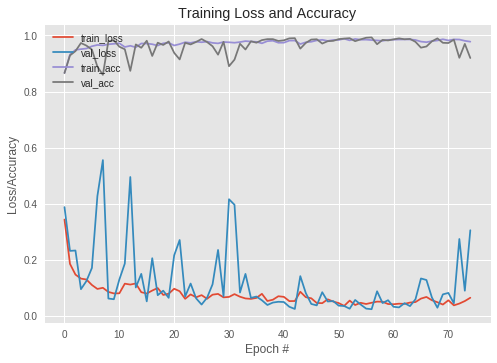

In [85]:
plt.style.use("ggplot")
plt.figure()
N = EPOCHS
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")
plt.savefig(args["plot"])

In [86]:
!ls

classifier.model  classifier.pickle  datalab  datasetzs  drive


In [0]:
from keras.preprocessing.image import img_to_array
from keras.models import load_model

In [88]:
from google.colab import files
files.upload()

Saving example_01.jpg to example_01.jpg


{'example_01.jpg': b'\xff\xd8\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x03\x84\x02K\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9\xda\xe1\xe2\xe3\xe4\xe5\xe6\xe7\xe8\xe9\xea\xf1\xf

In [101]:
from google.colab import files
files.upload()

Saving example_02.jpg to example_02.jpg


{'example_02.jpg': b'\xff\xd8\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x03\x84\x02K\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5\xd6\xd7\xd8\xd9\xda\xe1\xe2\xe3\xe4\xe5\xe6\xe7\xe8\xe9\xea\xf1\xf

In [102]:
from google.colab import files
files.upload()

Saving example_03.jpg to example_03.jpg


{'example_03.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xfe\x00;CREATOR: gd-jpeg v1.0 (using IJG JPEG v62), quality = 90\n\xff\xdb\x00C\x00\x03\x02\x02\x03\x02\x02\x03\x03\x03\x03\x04\x03\x03\x04\x05\x08\x05\x05\x04\x04\x05\n\x07\x07\x06\x08\x0c\n\x0c\x0c\x0b\n\x0b\x0b\r\x0e\x12\x10\r\x0e\x11\x0e\x0b\x0b\x10\x16\x10\x11\x13\x14\x15\x15\x15\x0c\x0f\x17\x18\x16\x14\x18\x12\x14\x15\x14\xff\xdb\x00C\x01\x03\x04\x04\x05\x04\x05\t\x05\x05\t\x14\r\x0b\r\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\x14\xff\xc0\x00\x11\x08\x05\xa0\x03\xc0\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x

In [0]:
image = cv2.imread("example_01.jpg")
image = cv2.resize(image, (96, 96))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

image1 = cv2.imread("example_02.jpg")
image1 = cv2.resize(image1, (96, 96))
image1 = image1.astype("float") / 255.0
image1 = img_to_array(image1)
image1 = np.expand_dims(image1, axis=0)

image2 = cv2.imread("example_03.jpg")
image2 = cv2.resize(image2, (96, 96))
image2 = image2.astype("float") / 255.0
image2 = img_to_array(image2)
image2 = np.expand_dims(image2, axis=0)

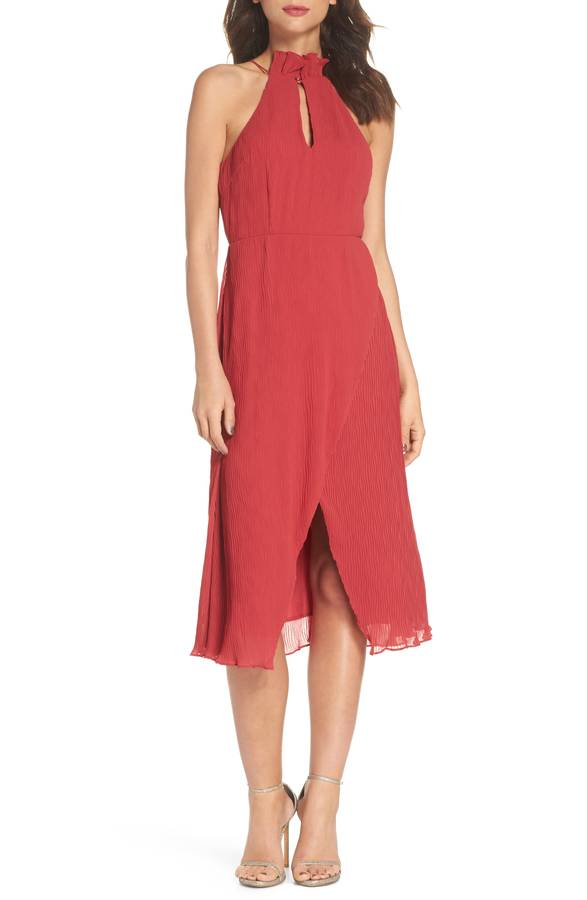

In [100]:
from IPython.display import Image
Image('example_01.jpg')

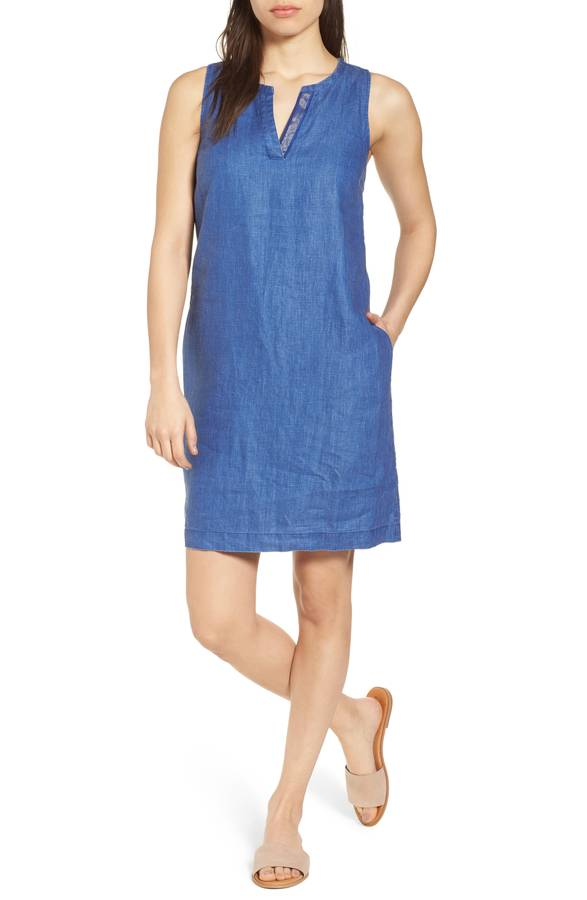

In [105]:
from IPython.display import Image
Image('example_02.jpg')

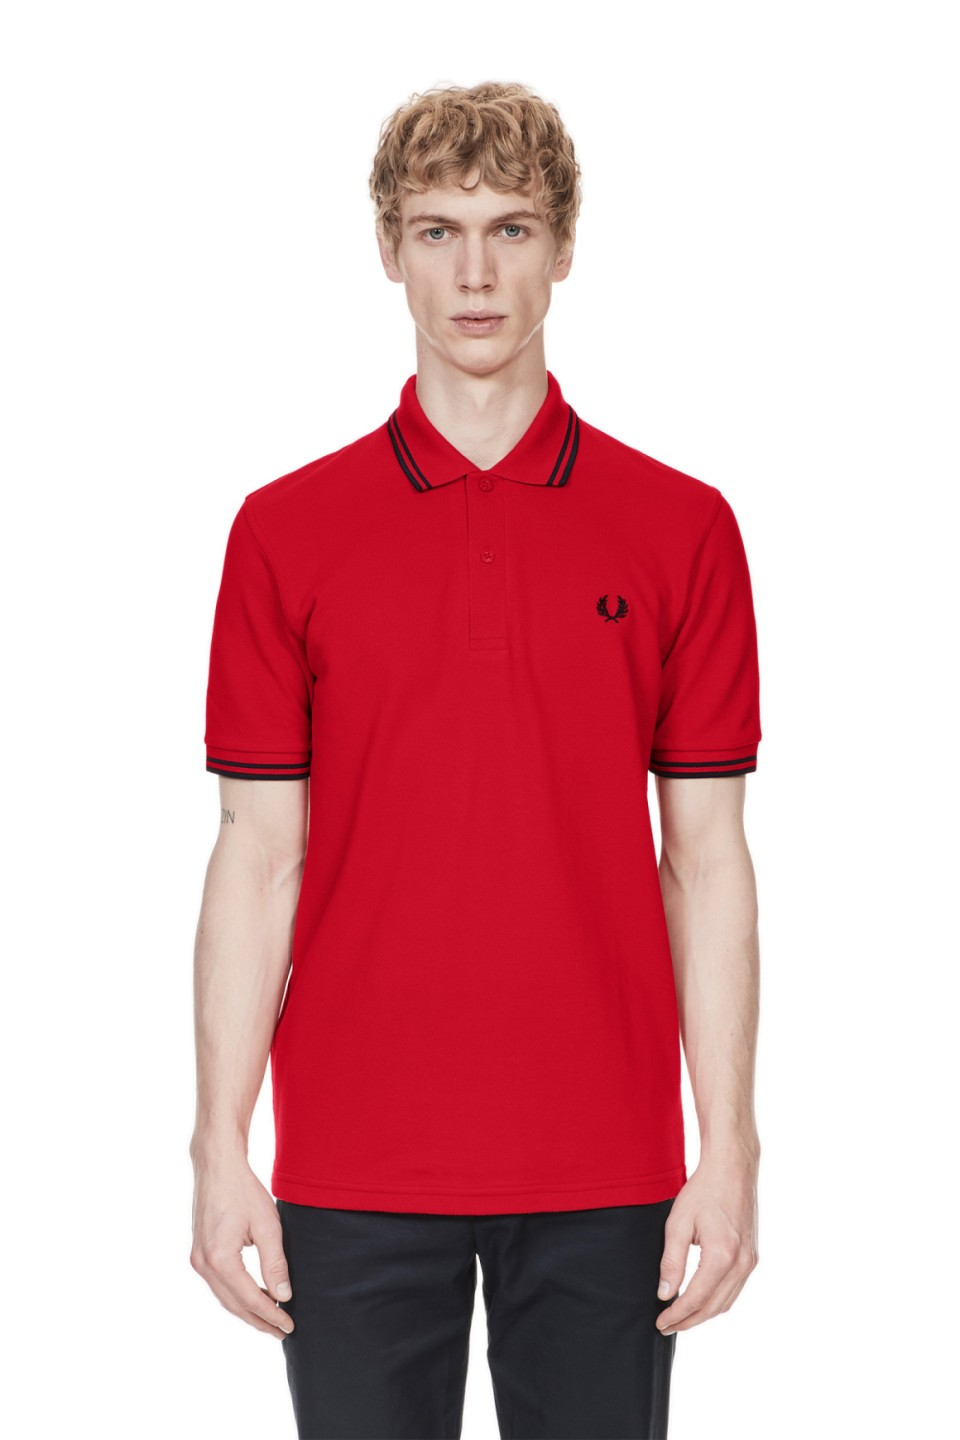

In [106]:
from IPython.display import Image
Image('example_03.jpg')

In [0]:
output = cv2.imread("example_01.jpg")
output1 = cv2.imread("example_02.jpg")
output2 = cv2.imread("example_03.jpg")

In [95]:
print("[INFO] loading network...")
model = load_model("classifier.model")
mlb = pickle.loads(open("classifier.pickle", "rb").read())

[INFO] loading network...


In [96]:
print("[INFO] classifying image...")
proba = model.predict(image)[0]
idxs = np.argsort(proba)[::-1][:2]

[INFO] classifying image...


In [0]:
# For Image 1

In [99]:
# loop over the indexes of the high confidence class labels
for (i, j) in enumerate(idxs):
	# build the label and draw the label on the image
	label = "{}: {:.2f}%".format(mlb.classes_[j], proba[j] * 100)
	cv2.putText(output, label, (10, (i * 30) + 25), 
		cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# show the probabilities for each of the individual labels
for (label, p) in zip(mlb.classes_, proba):
	print("{}: {:.2f}%".format(label, p * 100))

black: 0.00%
blue: 0.03%
dress: 98.50%
jeans: 0.00%
red: 100.00%
shirt: 0.61%


In [0]:
# For image 2

In [110]:
print("[INFO] classifying image...")
proba = model.predict(image1)[0]
idxs = np.argsort(proba)[::-1][:2]


# loop over the indexes of the high confidence class labels
for (i, j) in enumerate(idxs):
	# build the label and draw the label on the image
	label = "{}: {:.2f}%".format(mlb.classes_[j], proba[j] * 100)
	cv2.putText(output1, label, (10, (i * 30) + 25), 
		cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# show the probabilities for each of the individual labels
for (label, p) in zip(mlb.classes_, proba):
	print("{}: {:.2f}%".format(label, p * 100))

[INFO] classifying image...
black: 0.00%
blue: 100.00%
dress: 81.17%
jeans: 0.00%
red: 0.00%
shirt: 10.24%


In [0]:
# For image 3

In [111]:
print("[INFO] classifying image...")
proba = model.predict(image2)[0]
idxs = np.argsort(proba)[::-1][:2]


# loop over the indexes of the high confidence class labels
for (i, j) in enumerate(idxs):
	# build the label and draw the label on the image
	label = "{}: {:.2f}%".format(mlb.classes_[j], proba[j] * 100)
	cv2.putText(output1, label, (10, (i * 30) + 25), 
		cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# show the probabilities for each of the individual labels
for (label, p) in zip(mlb.classes_, proba):
	print("{}: {:.2f}%".format(label, p * 100))

[INFO] classifying image...
black: 0.00%
blue: 0.11%
dress: 4.66%
jeans: 0.00%
red: 100.00%
shirt: 96.84%


In [0]:
# End of tutorial, images according to the tutorial https://www.pyimagesearch.com/2018/05/07/multi-label-classification-with-keras/. 